In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
Churn_Modelling = pd.read_csv('Churn_Modelling.csv')

In [5]:
Churn_Modelling

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
Churn_Modelling.columns 

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
Churn_Modelling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
Churn_Modelling.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
Churn_Modelling=Churn_Modelling.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [15]:
Churn_Modelling

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [17]:
Churn_Modelling.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

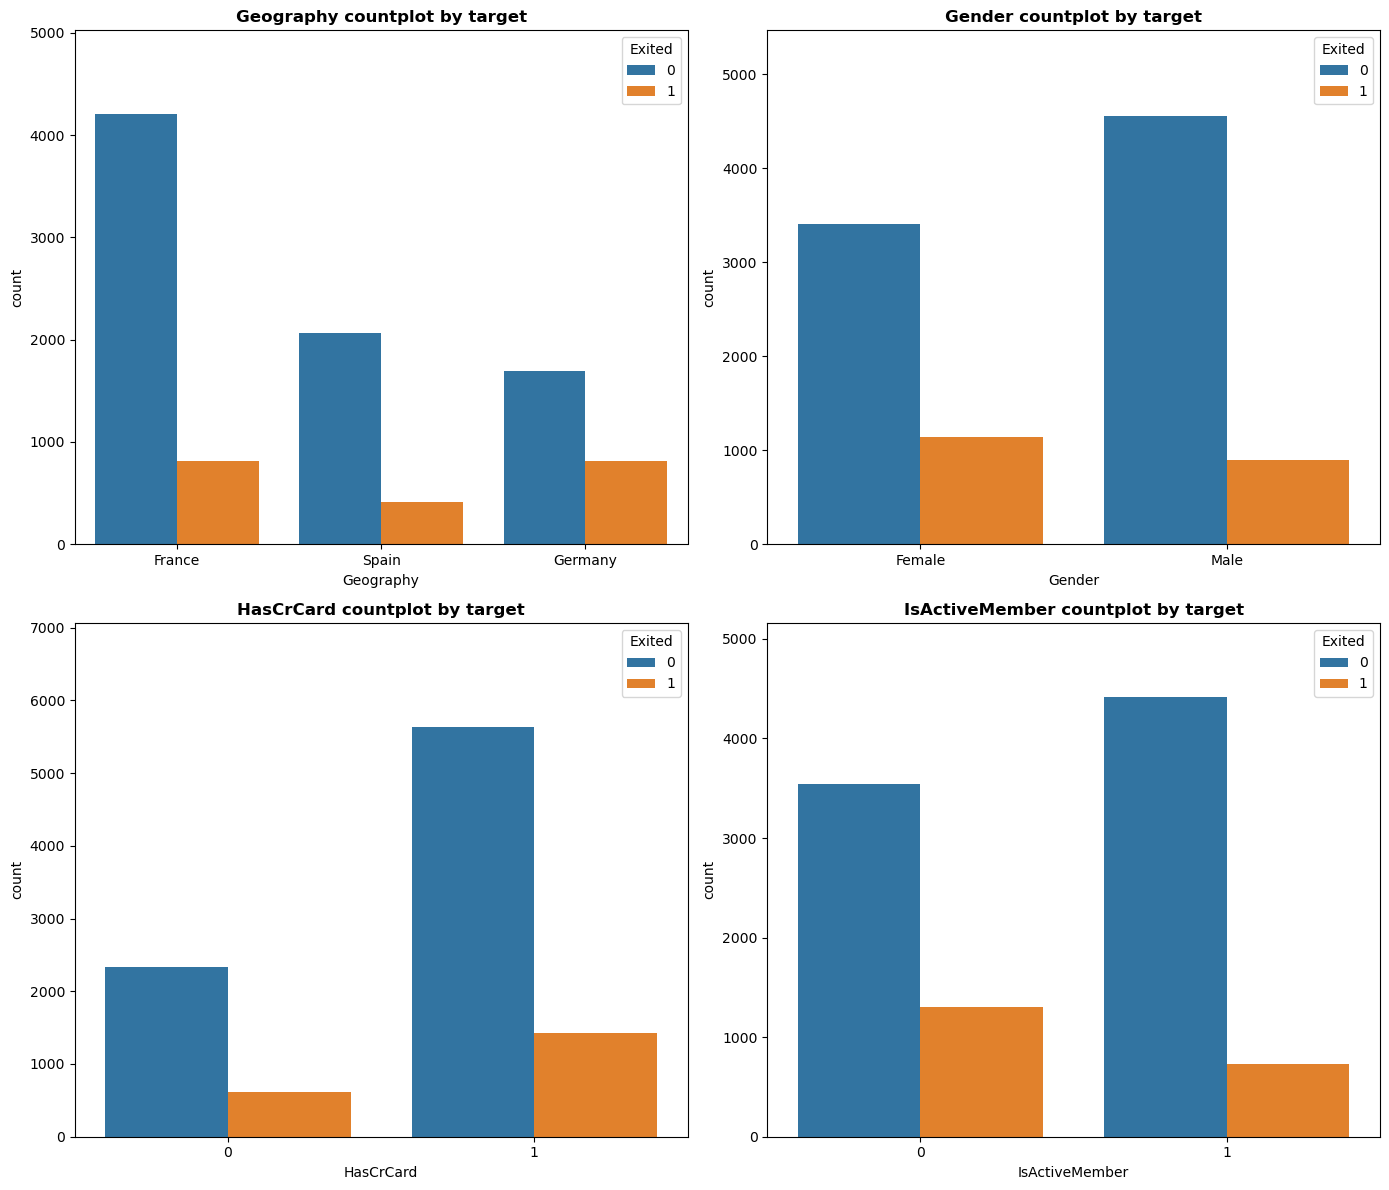

In [28]:
plt.figure(figsize=(14, len(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])*3))

for i, col in enumerate(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']):
    
    plt.subplot(len(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])//2 + len(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']) % 2, 2, i+1)
    sns.countplot(x=col, hue="Exited", data=Churn_Modelling)
    plt.title(f"{col} countplot by target", fontweight = 'bold')
    plt.ylim(0, Churn_Modelling[col].value_counts().max() + 10)
    
plt.tight_layout()
plt.show()

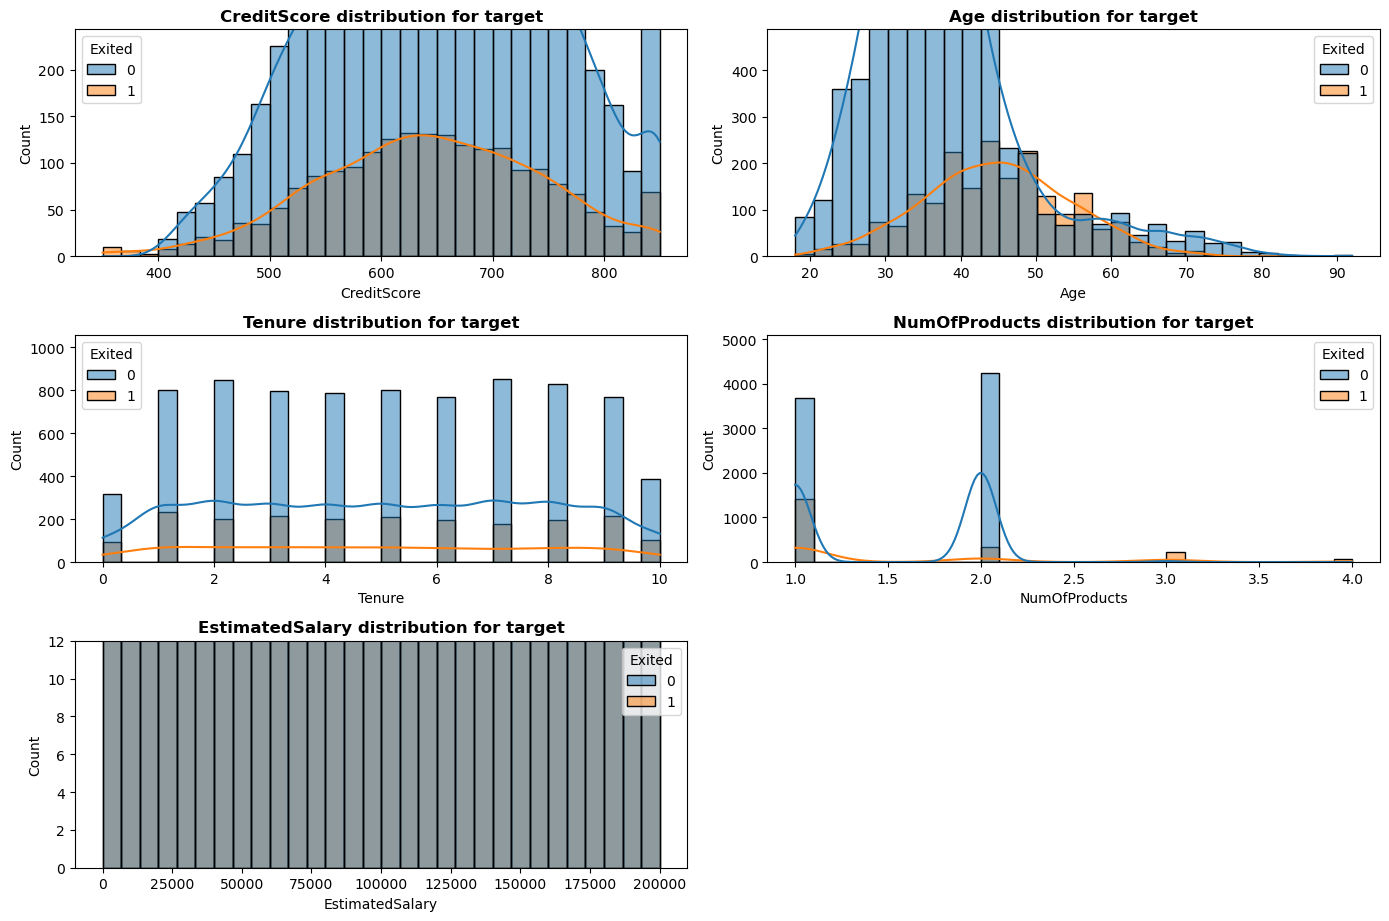

In [30]:
plt.figure(figsize=(14, len(['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']) * 3))

for i, col in enumerate(['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']):
    # Plotting for outcome
    plt.subplot(len(['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']), 2, i+1)
    sns.histplot(x=col, hue="Exited", data=Churn_Modelling, bins=30, kde=True)
    plt.title(f"{col} distribution for target", fontweight="bold")
    plt.ylim(0, Churn_Modelling[col].value_counts().max() + 10)
    
plt.tight_layout()
plt.show()

In [22]:
# exclude_columns=['RowNumber', 'CustomerId', "Exited"]
# if exclude_columns is None:
#         exclude_columns = []

#     # Identify numerical columns and exclude specified ones
# numerical_columns = Churn_Modelling.select_dtypes(include=['number']).columns
# numerical_columns = [col for col in numerical_columns if col not in exclude_columns]
# num_cols = 3  # Number of columns for the subplot grid
# num_rows = (len(['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']) + num_cols - 1) // num_cols  # Calculate number of rows needed
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
# fig.suptitle('Distribution of Numerical Features', fontsize=16)
# for i, col in enumerate(['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']):
#         sns.histplot(Churn_Modelling[col], kde=True, color="skyblue", element="step", stat="density")
#         axes[i].set_title(f'Distribution of {col}', fontsize=14)
#         axes[i].set_xlabel(col, fontsize=12)
#         axes[i].set_ylabel('Density', fontsize=12)

#     # Remove unused axes
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

#     # Adjust layout
#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the main title space
#     plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
Churn_Modelling['Gender']=labelencoder.fit_transform(Churn_Modelling['Gender'])
Churn_Modelling['Geography']=labelencoder.fit_transform(Churn_Modelling['Geography'])

In [35]:
Churn_Modelling

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [37]:
Churn_Modelling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [39]:
x = Churn_Modelling.drop('Exited',axis=1)
y = Churn_Modelling['Exited']

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [45]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(x_train, y_train)

C:\Users\rajag\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
pred_1 = model_1.predict(x_test)

In [51]:
model_1.score(x_train,y_train)

0.79275

In [55]:
from sklearn.naive_bayes import BernoulliNB

model_2 = BernoulliNB()
model_2.fit(x_train, y_train)

pred_2 = model_2.predict(x_test)

In [57]:
model_2.score(x_train,y_train)

0.796

In [59]:
from sklearn.ensemble import RandomForestClassifier

model_3 = RandomForestClassifier()
model_3.fit(x_train, y_train)

pred_3 = model_3.predict(x_test)

In [61]:
model_3.score(x_train,y_train)

1.0

In [63]:
from sklearn.metrics import accuracy_score

print("Evaluating the Model:")
print("--" * 10)
print("Logistic Regressoin Model AC:", accuracy_score(y_test, pred_1))
print("BernoulliNB Model AC:", accuracy_score(y_test, pred_2))
print("RandomForestClassifier Model AC:", accuracy_score(y_test, pred_3))

Evaluating the Model:
--------------------
Logistic Regressoin Model AC: 0.786
BernoulliNB Model AC: 0.7975
RandomForestClassifier Model AC: 0.8645


In [65]:
import pickle

model_name = "b_c_churn_model.pkl"

with open(model_name, 'wb') as file:
    pickle.dump(model_3, file)